## Load data.

In [1]:
import numpy as np
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt


CWD = os.path.abspath("")  # Jupyter notebook path.
dir_dict = os.path.join(CWD, "dicts")  # Data to plot.
dir_output = os.path.join(CWD, "output")  # Folder to put figures in.
dir_npy = os.path.join(CWD, "npy")  # Data files needed for plotting figures.

# Set up plotting parameters.
sent_colors = ["#504DB2", "#414042", "#B2504D"]  # POS, NEU, NEG
# costra_colors = ["#2CBEC6", "#F59448"]  # collaborators, non-collaborators
# misc_colors = ["#E6B32F", "#3F6F88"]
font_kw = {"family": "arial", "weight": "normal", "size": "7"}  # Markers and such.
mpl.rc("font", **font_kw)

# Load data to plot.
with open(os.path.join(dir_dict, "cite2sent_2.pkl"), "rb") as f:
    cite2sent_emp = pickle.load(f)  # Each citation pair has just 1 sentiment; empirical.
with open(os.path.join(dir_dict, "cite2sent_null_param.pkl"), "rb") as f:
    cite2sent_nul = pickle.load(f)  # Null model parameters.
with open(os.path.join(dir_dict, "cite2distance.pkl"), "rb") as f:
    cite2distance = pickle.load(f)  # Collaboration distance.

ratio_mat_rel = np.load(os.path.join(dir_npy, "ratio_mat_rel-collab_dist.npy"))
grps = np.load(os.path.join(dir_npy, "groups-collab_dist.npy"))

## Make figures.

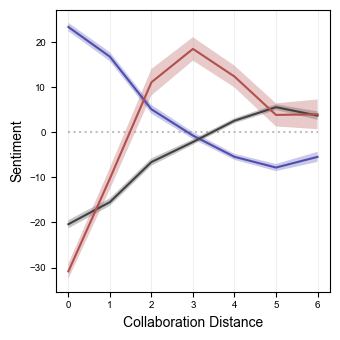

In [2]:
# Figure production.
fig, ax = plt.subplots(figsize=(3.41, 3.41))
xticklabels = [f"{x}" for x in grps]  # Collaboration distance label.
x_arr = np.arange(len(xticklabels))
# Baseline (indistinguishable from null).
ax.plot(x_arr, [0 for _ in x_arr], color="grey", alpha=0.5, zorder=1, linestyle=":")

for i in range(3):  # One curve for each of the 3 sentiments.
    m = np.nanmean(ratio_mat_rel[:, i, :], axis=-1)  # From bootstrap sampling distribution.
    std = np.nanstd(ratio_mat_rel[:, i, :], axis=-1)  # From bootstrap sampling distribution.
    ax.plot(x_arr, m, color=sent_colors[i])
    ax.fill_between(x_arr, m - std, m + std, color=sent_colors[i], alpha=0.3, edgecolor=None)

ax.set_xlabel("Collaboration Distance", size=10)  # x-large
ax.set_ylabel("Sentiment", size=10)  # x-large
ax.set_xticks(x_arr, xticklabels)
ax.grid(which="major", axis="x", alpha=0.2)

fig.tight_layout()
plt.show()
fig.savefig(os.path.join(dir_output, "Collaboration Distance.svg"), bbox_inches="tight", transparent=True)
fig.clf()  # Clear figure.
plt.close(fig=fig)  # Close figure.